# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

# Data Dictionary for Market Segmentation:

 - spending: Amount spent by the customer per month (in 1000s)
 - advance_payments: Amount paid by the customer in advance by cash (in 100s)
 - probability_of_full_payment: Probability of payment done in full by the customer to the bank
 - current_balance: Balance amount left in the account to make purchases (in 1000s)
 - credit_limit: Limit of the amount in credit card (10000s)
 - min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
 - max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Import the libraries

In [5]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline
from scipy import stats

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly

In [6]:
#Read the csv file
df=pd.read_csv('bank_marketing_part1_Data.csv')

### Load data

### Checking the data

In [7]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


##### Observation
Data looks good based on intial records seen in top 5 and bottom 5.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


##### Observation:

- 7 variables and 210 records. 
- No missing record based on intial analysis. 
- All the variables numeric type.

In [10]:
### data dimensions
df.shape

(210, 7)

In [11]:
### Checking for Missing Values
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


##### Observation
No missing value.

# Univariate analysis

### Checking the Summary Statistic

In [13]:
## Intital descriptive analysis of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


##### Observation
 - Based on summary descriptive, the data looks good.
 - We see for most of the variable, mean/medium are nearly equal
 - Include a 90% to see variations and it looks distributely evenly
 - Std Deviation is high for spending variable

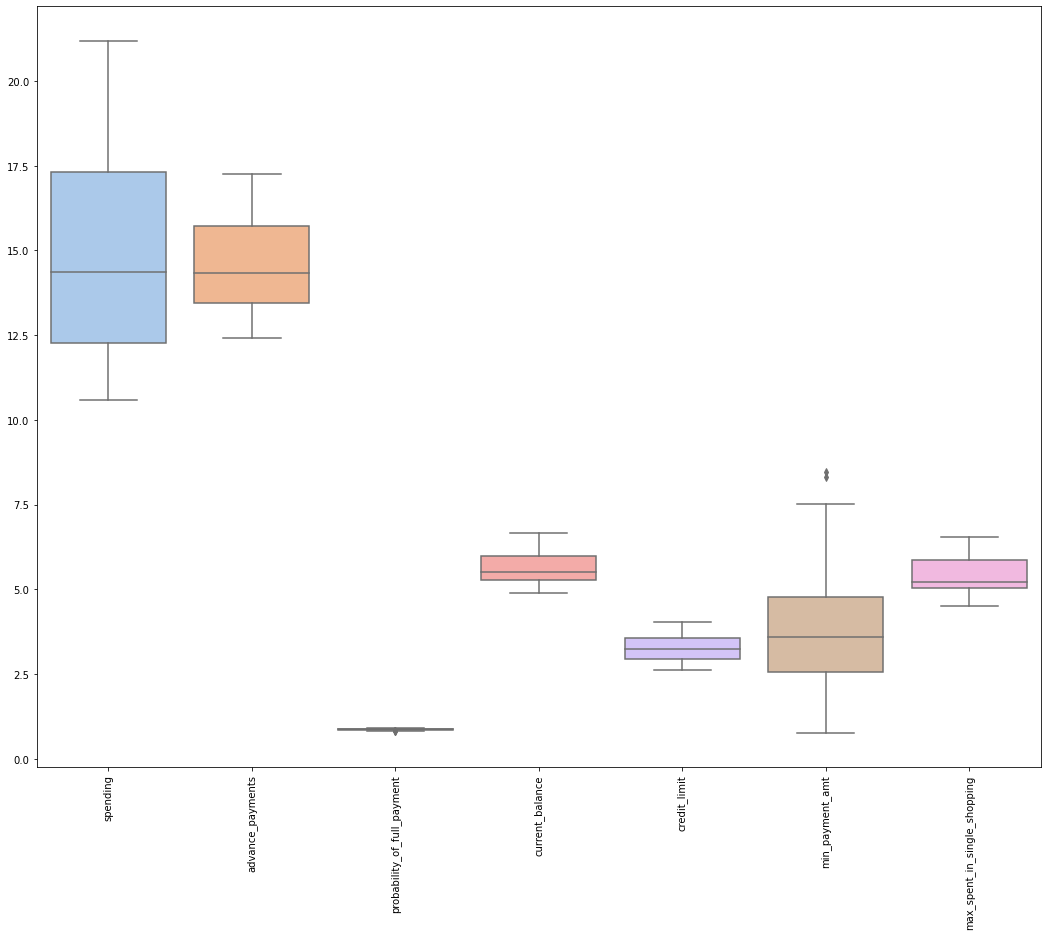

In [14]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
#sns.color_palette("pastel")
box= sns.boxplot(data=df, palette='pastel')
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

### Spending variable

In [15]:
def univaranalysis(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print('null value ',df[column].isnull().sum())
    print(df[column].describe(),end='     ')
    print('')
    print('')

    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [16]:
def outlier_info(col):
    sorted(col)
    #Q1,Q3=np.percentile(col,[25,75])
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    print('Number of upper outliers in',col,': ', df[df[col]>upper_range][col].count())
    print('Number of lower outliers in',col,': ', df[df[col]<lower_range][col].count())
    print('% of upper outlier in',col,': ',round(df[df[col]>upper_range][col].count()*100/len(df),2), '%')
    print('% of lower outlier in',col,': ',round(df[df[col]<lower_range][col].count()*100/len(df),2), '%')

Description of spending
----------------------------------------------------------------------------
null value  0
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64     

Distribution of spending
----------------------------------------------------------------------------


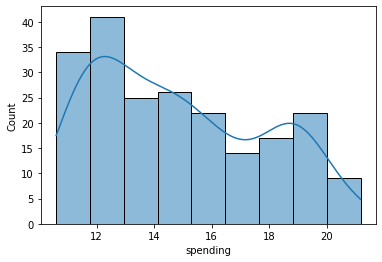

BoxPlot of spending
----------------------------------------------------------------------------


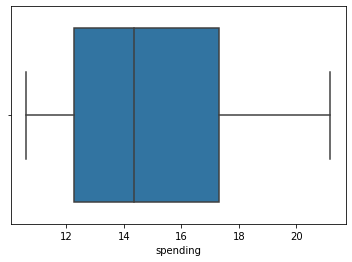

None


In [17]:
print(univaranalysis('spending'))

In [18]:
outlier_info('spending')

Number of upper outliers in spending :  0
Number of lower outliers in spending :  0
% of upper outlier in spending :  0.0 %
% of lower outlier in spending :  0.0 %


### advance_payments variable

Description of advance_payments
----------------------------------------------------------------------------
null value  0
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64     

Distribution of advance_payments
----------------------------------------------------------------------------


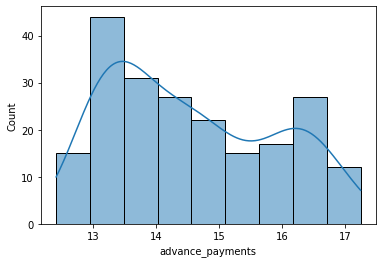

BoxPlot of advance_payments
----------------------------------------------------------------------------


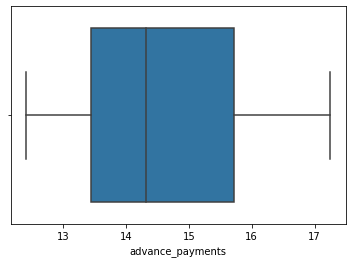

None


In [19]:
print(univaranalysis('advance_payments'))

In [20]:
outlier_info('advance_payments')

Number of upper outliers in advance_payments :  0
Number of lower outliers in advance_payments :  0
% of upper outlier in advance_payments :  0.0 %
% of lower outlier in advance_payments :  0.0 %


##### probability_of_full_payment variable

Description of probability_of_full_payment
----------------------------------------------------------------------------
null value  0
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64     

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


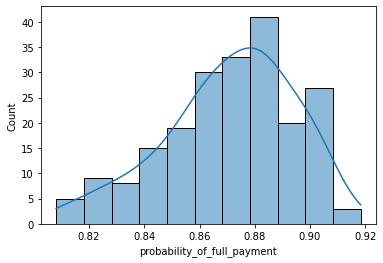

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


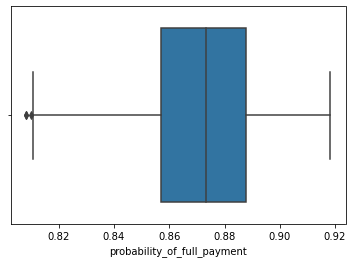

None


In [21]:
print(univaranalysis('probability_of_full_payment'))

In [22]:
outlier_info('probability_of_full_payment')

Number of upper outliers in probability_of_full_payment :  0
Number of lower outliers in probability_of_full_payment :  3
% of upper outlier in probability_of_full_payment :  0.0 %
% of lower outlier in probability_of_full_payment :  1.43 %


##### current_balance variable

Description of current_balance
----------------------------------------------------------------------------
null value  0
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64     

Distribution of current_balance
----------------------------------------------------------------------------


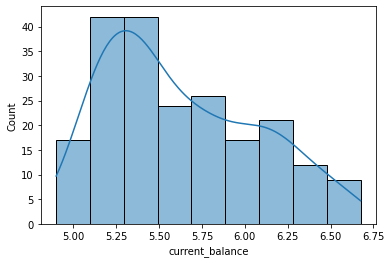

BoxPlot of current_balance
----------------------------------------------------------------------------


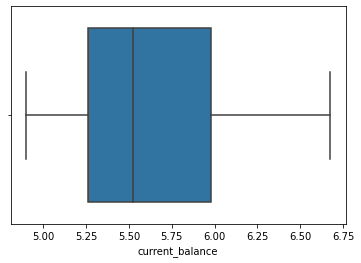

None


In [23]:
print(univaranalysis('current_balance'))

In [24]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())

Range of values:  1.7759999999999998


In [25]:
outlier_info('current_balance')

Number of upper outliers in current_balance :  0
Number of lower outliers in current_balance :  0
% of upper outlier in current_balance :  0.0 %
% of lower outlier in current_balance :  0.0 %


##### credit_limit variable

Description of credit_limit
----------------------------------------------------------------------------
null value  0
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64     

Distribution of credit_limit
----------------------------------------------------------------------------


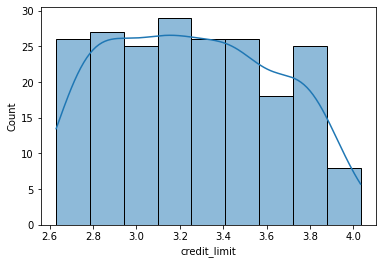

BoxPlot of credit_limit
----------------------------------------------------------------------------


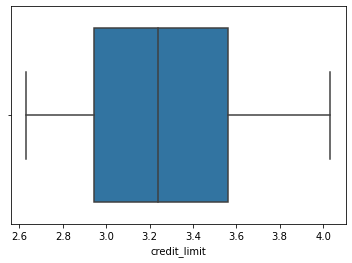

None


In [26]:
print(univaranalysis('credit_limit'))

In [27]:
print('Range of values: ', df['credit_limit'].max()-df['credit_limit'].min())

Range of values:  1.4030000000000005


In [28]:
outlier_info('credit_limit')

Number of upper outliers in credit_limit :  0
Number of lower outliers in credit_limit :  0
% of upper outlier in credit_limit :  0.0 %
% of lower outlier in credit_limit :  0.0 %


##### min_payment_amt variable

Description of min_payment_amt
----------------------------------------------------------------------------
null value  0
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64     

Distribution of min_payment_amt
----------------------------------------------------------------------------


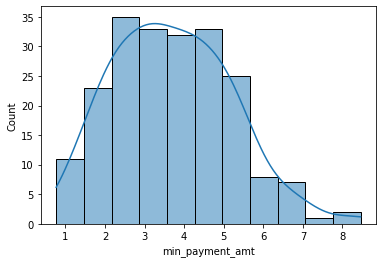

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


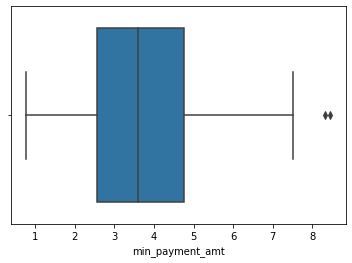

None


In [29]:
print(univaranalysis('min_payment_amt'))

In [30]:
print('Range of values: ', df['min_payment_amt'].max()-df['min_payment_amt'].min())

Range of values:  7.690899999999999


In [31]:
outlier_info('min_payment_amt')

Number of upper outliers in min_payment_amt :  2
Number of lower outliers in min_payment_amt :  0
% of upper outlier in min_payment_amt :  0.95 %
% of lower outlier in min_payment_amt :  0.0 %


##### max_spent_in_single_shopping variable

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
null value  0
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64     

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


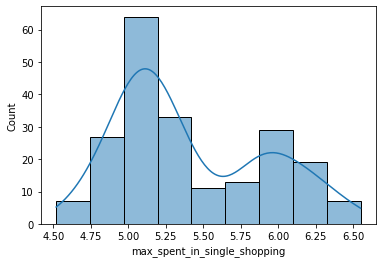

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


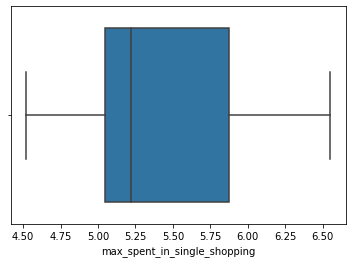

None


In [32]:
print(univaranalysis('max_spent_in_single_shopping'))

In [33]:
print('Range of values: ', df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [34]:
outlier_info('max_spent_in_single_shopping')

Number of upper outliers in max_spent_in_single_shopping :  0
Number of lower outliers in max_spent_in_single_shopping :  0
% of upper outlier in max_spent_in_single_shopping :  0.0 %
% of lower outlier in max_spent_in_single_shopping :  0.0 %


In [35]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

##### Observations

 - Credit limit average is around $3.258(10000s)
 - Distribtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail
   
    

# Multivariate analysis

# Check for multicollinearity

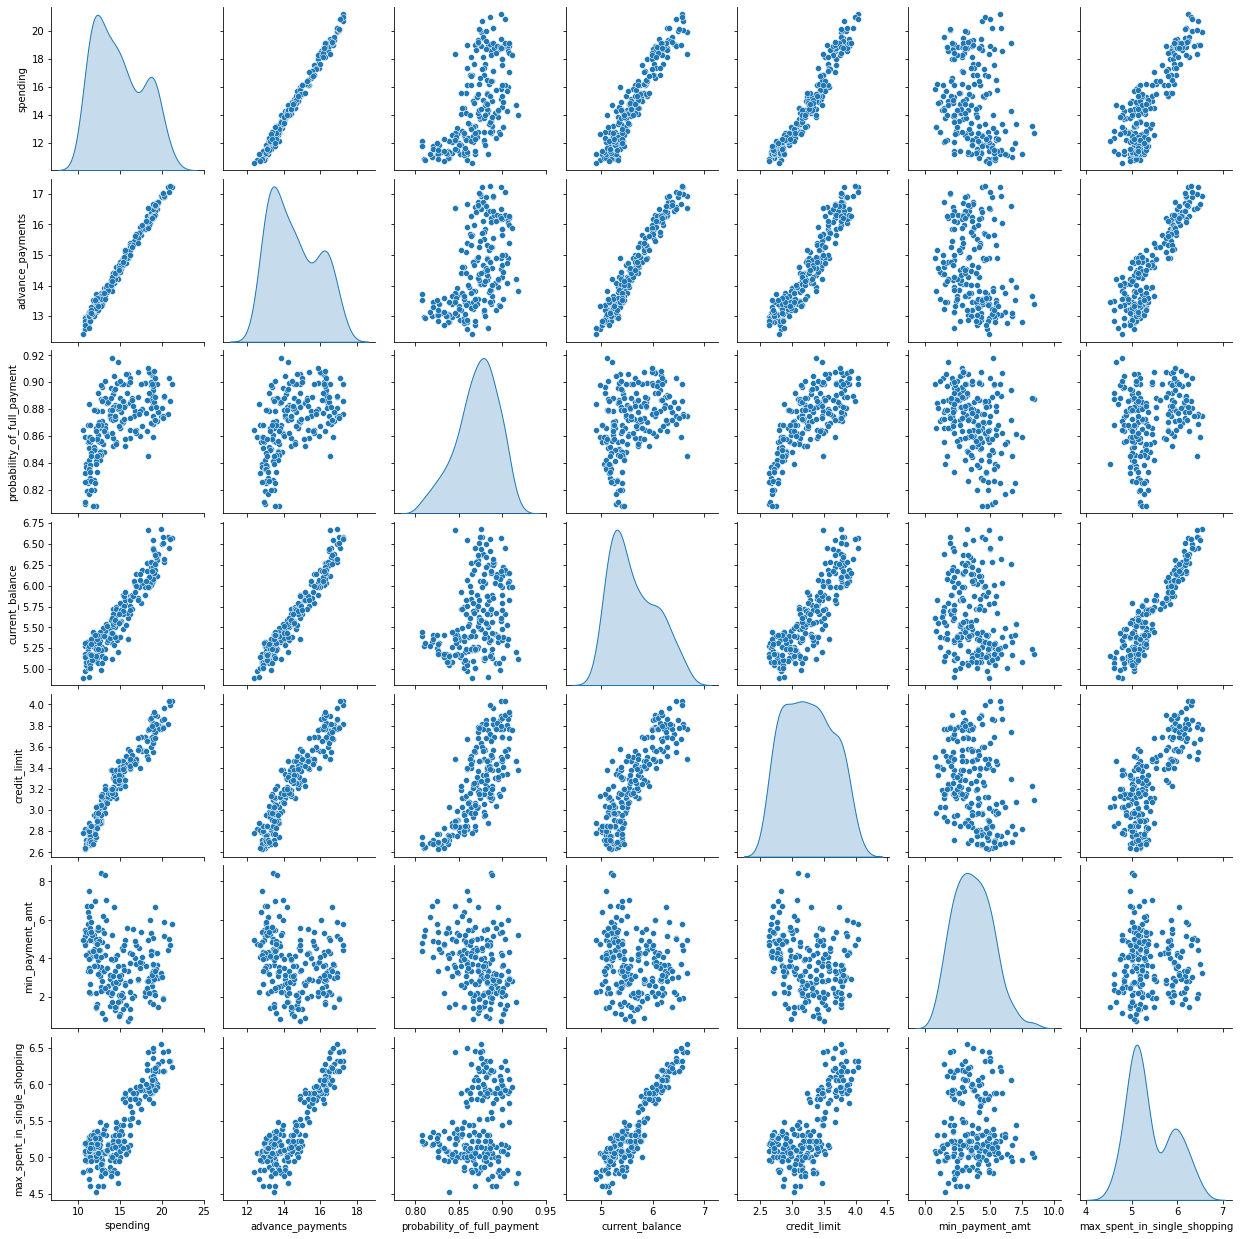

In [36]:
sns.pairplot(df,diag_kind='kde');

###### Observation
Strong positive correlation between 
 - spending & advance_payments, 
 - advance_payments & current_balance, 
 - credit_limit & spending
 - spending & current_balance
 - credit_limit & advance_payments
 - max_spent_in_single_shopping	& current_balance


In [37]:
#correlation matrix
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


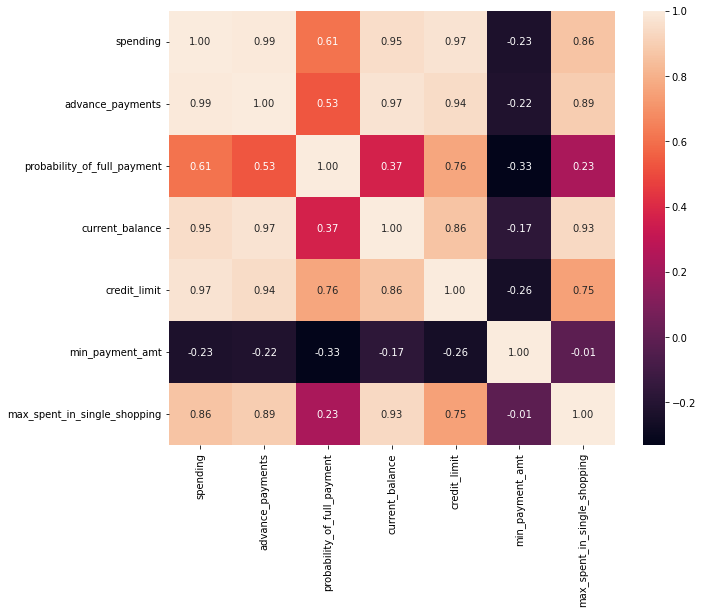

In [38]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

- Scaling needs to be done as the values of the variables are different.
- spending, advance_payments are in different values and this may get more weightage. 
- Also, have shown below the plot of the data prior and after scaling.
- Scaling will have all the values in the relative same range.
- zscore used to standarised the data to relative same scale -3 to +3.

In [39]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


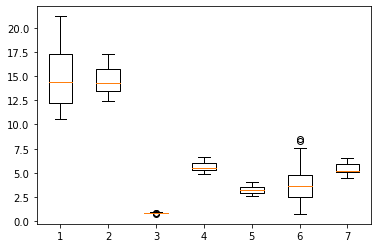

In [40]:
# prior to scaling 
plt.boxplot(df)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
# Creating an object for the StandardScaler function
X= StandardScaler()
df_scaled= X.fit_transform(df)

In [42]:
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [43]:
pd.DataFrame(df_scaled).head()

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


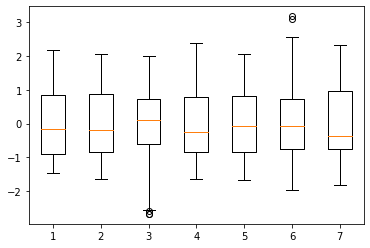

In [44]:
#after scaling
plt.boxplot(df_scaled)
plt.show()

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

##### Creating the Dendrogram
##### Importing dendrogram and linkage module

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

##### Choosing ward linkage method

In [46]:
link_method= linkage(df_scaled, method = 'ward')

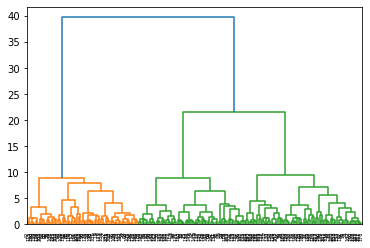

In [47]:
dend= dendrogram(link_method)

##### Cutting the Dendrogram with suitable clusters

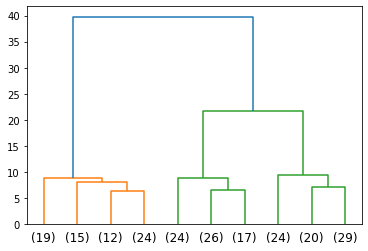

In [48]:
dend= dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

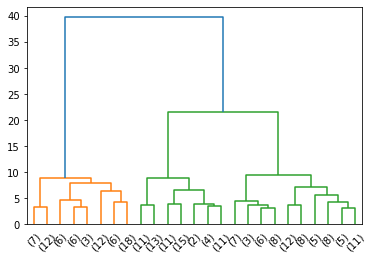

In [49]:
dend= dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

##### Importing fcluster module to create clusters

In [50]:
from scipy.cluster.hierarchy import fcluster

In [51]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [52]:
df1=df.copy()

In [53]:
df1['clusters'] = clusters

In [54]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster Frequency

In [55]:
freq= df1['clusters'].value_counts().sort_index()
freq

1    70
2    67
3    73
Name: clusters, dtype: int64

##### Cluster Profiles

In [56]:
aggdata=df1.groupby('clusters').mean()
aggdata['freq']= freq
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


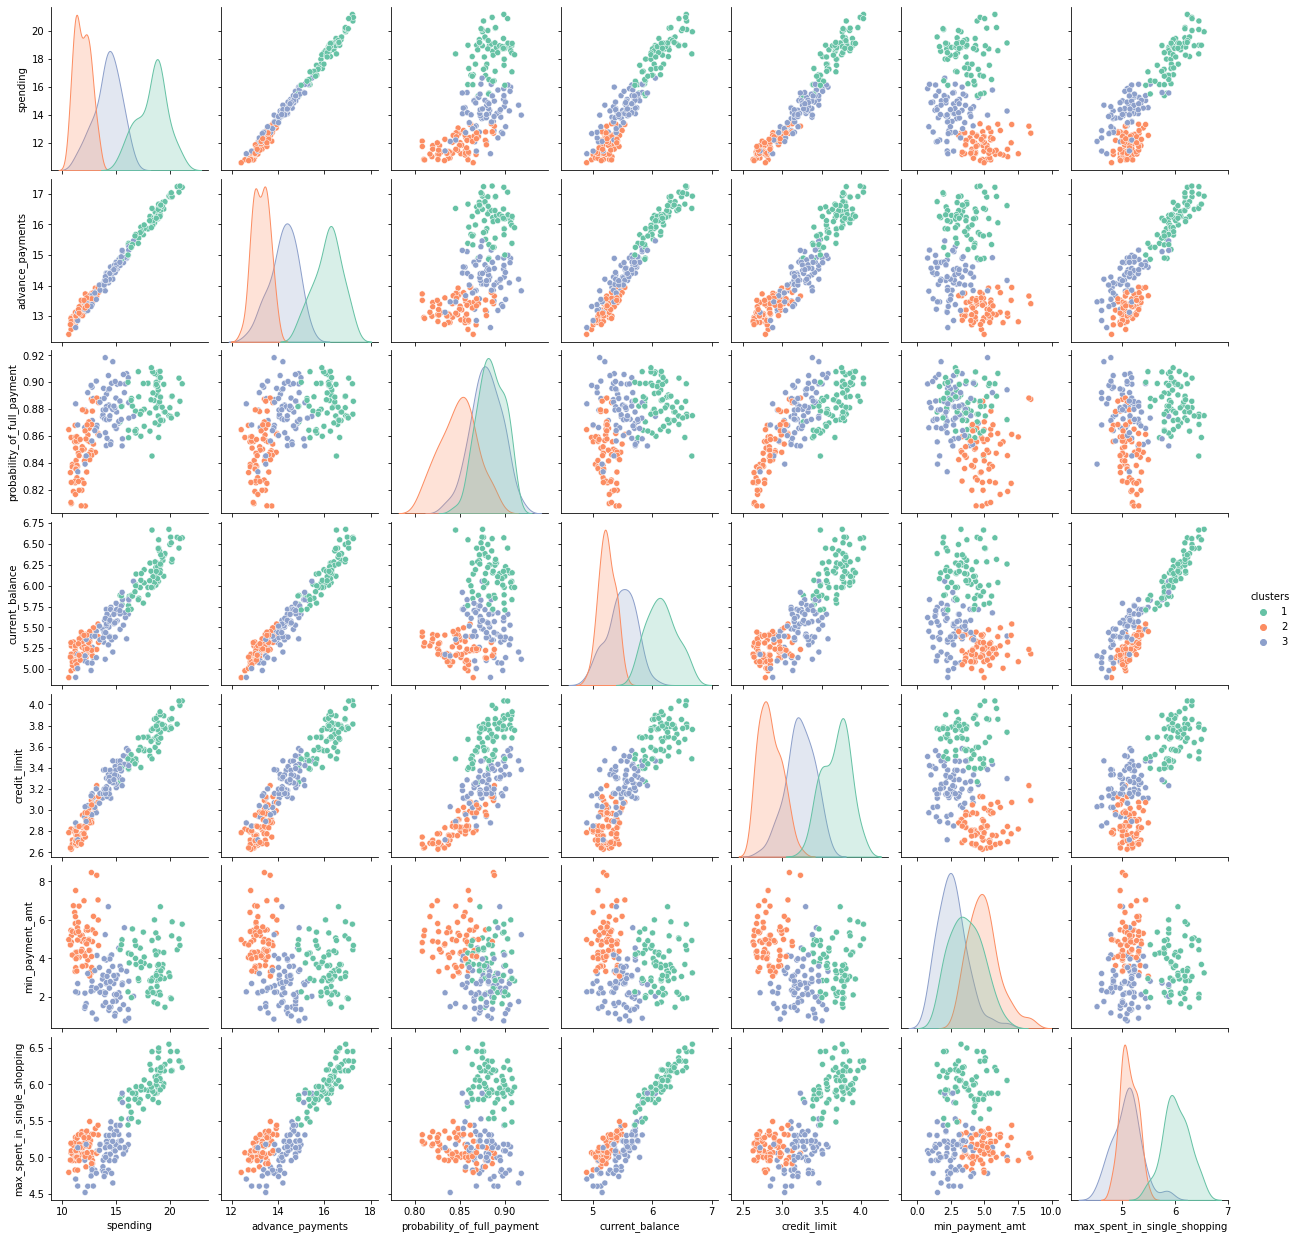

In [57]:
sns.pairplot(df1, diag_kind='kde', hue='clusters', palette='Set2');

# Agglomerative Clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
aglo.fit_predict(df_scaled)

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0], dtype=int64)

In [59]:
df2= df.copy()

In [60]:
df2['Aglo-label'] = aglo.fit_predict(df_scaled)

In [61]:
df2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Aglo-label
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [62]:
aggdata1=df2.groupby('Aglo-label').mean()
aggdata1['Freq']=df2['Aglo-label'].value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Aglo-label,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67


In [63]:
df2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Aglo-label
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,0
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1


# Observation

- Both the method are almost similer means , minor variation, which we know it occurs.

- We for cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering 

- Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.

- And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [64]:
from sklearn.cluster import KMeans 

### Forming 2 Clusters with K=2

In [65]:
#Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [66]:
# Fit K means on the scaled_df
k_means.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [67]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

### Within Cluster Sum of Squares

In [68]:
k_means.inertia_

659.1717544870411

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [69]:
k_means = KMeans(n_clusters = 1, random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

1469.9999999999995

In [70]:
k_means = KMeans(n_clusters = 2, random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

659.1717544870411

In [71]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

430.65897315130064

In [72]:
k_means = KMeans(n_clusters = 4, random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

371.301721277542

In [73]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

327.9608240079031

In [74]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df_scaled)
k_means.inertia_

290.5900305968219

WSS reduces as K keeps increasing

In [75]:
wss =[] 

In [76]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [77]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9608240079031,
 290.5900305968219,
 264.83153087478144,
 240.6837259501598,
 220.85285825594738,
 206.3829103601579]

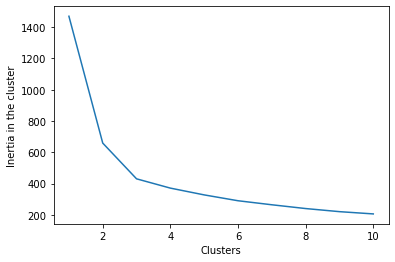

In [78]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [79]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


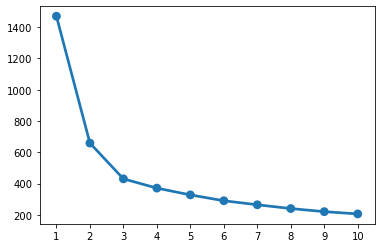

In [80]:
sns.pointplot(a, wss);

### KMeans with K= 3

In [81]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled )
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [83]:
silhouette_score(df_scaled,labels,random_state=1)

0.40072705527512986

### KMeans with K= 4

In [84]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled )
labels1 = k_means.labels_

### Cluster evaluation for 4 clusters: the silhouette score

In [85]:
silhouette_score(df_scaled,labels1,random_state=1)

0.32757426605518075

#### silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [86]:
from sklearn import metrics

In [87]:
scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))
scores

[0.46577247686580914,
 0.40072705527512986,
 0.32757426605518075,
 0.27836514155320397,
 0.28389221057730224,
 0.2693434429016323,
 0.2578633719728751,
 0.25981172609715214,
 0.24034666351680564]

In [88]:
cluster_errors= []
for num_clusters in range(1,11):
    kclusters= KMeans(num_clusters)
    kclusters.fit(df_scaled)
    cluster_errors.append(kclusters.inertia_)
cluster_errors

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.5811909715524,
 327.18981108824903,
 289.90077725445246,
 262.2851840412676,
 241.4821969966953,
 221.1215713261596,
 206.35340577800957]

In [89]:
clusters_df= pd.DataFrame({"num_clusters": range(1,11), "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1470.000000
1,2,659.171754
2,3,430.658973
3,4,371.581191
4,5,327.189811
5,6,289.900777
6,7,262.285184
7,8,241.482197
8,9,221.121571
9,10,206.353406


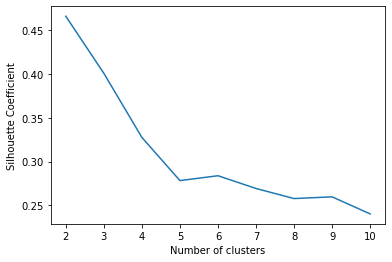

In [90]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [91]:
df3= df.copy()

Appending Clusters to the original dataset

In [92]:
df3["Clus_kmeans3"] = labels
df3

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2


### Cluster Profiling

In [93]:
df3.Clus_kmeans3.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans3, dtype: int64

In [94]:
aggdata2=df3.groupby('Clus_kmeans3').mean()
aggdata2['freq']=df3['Clus_kmeans3'].value_counts().sort_index()
aggdata2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [95]:
aggdata2.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,14.930068,14.596319,0.871353,5.640671,3.268768,3.694034,5.421409,70.000000
std,3.346471,1.494697,0.020048,0.484437,0.424078,1.018924,0.537274,2.645751
min,11.856944,13.247778,0.848253,5.231750,2.849542,2.707341,5.101722,67.000000
25%,13.147416,13.792762,0.864925,5.373164,3.054384,3.169857,5.111263,69.000000
50%,14.437887,14.337746,0.881597,5.514577,3.259225,3.632373,5.120803,71.000000
75%,16.466630,15.270590,0.882904,5.845132,3.478381,4.187381,5.581252,71.500000
max,18.495373,16.203433,0.884210,6.175687,3.697537,4.742389,6.041701,72.000000


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

# 3 group cluster via Kmeans

In [96]:
aggdata2.T

Clus_kmeans3,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848253,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.742389,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
freq,72.000000,67.000000,71.000000


# 3 group cluster via hierarchical clustering

In [97]:
aggdata.T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
freq,70.000000,67.000000,73.000000


### Cluster Group Profiles
     Group 1: High Spending 
     Group 3: Medium Spending 
     Group 2: Low Spending 

### Promotional strategies for each cluster

### Group 1 : High Spending Group
    
 - Giving any reward points might increase their purchases.
 - maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment.
 - Increase there credit limit. 
 - Increase spending habits.
 - Give loan against the credit card, as they are customers with good repayment record.
 - Tie up with luxary brands, which will drive more one_time_maximun spending.
    
    

### Group 3 : Medium Spending Group   
 - They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
 - Promote premium cards/loyality cars to increase transcations.
 - Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more
     

### Group 2 : Low Spending Group
    
  - Customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
  - Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)
    

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

# Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

# Importing all required Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

# Loading the Data

In [99]:
insurance_df = pd.read_csv("insurance_part2_data.csv")

# Checking the data

In [100]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [101]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


##### Observatiom

  - 10 variables
  - Age, Commision, Duration, Sales are numeric variable
  - rest are categorial variables
  - 3000 records, no missing one
  - 9 independant variable and one target variable - Claimed


# Check for missing value in any column

In [102]:
# Are there any missing values ?
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

##### Observation

No missing value

# Descriptive Statistics Summary

In [103]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [104]:
## Intital descriptive analysis of the data
insurance_df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,53.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,48.300,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,224.200,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,172.025,539.00


# Observation

    - duration has negative valu, it is not possible. Wrong entry.
    - Commision & Sales- mean and median varies signficantly
    

In [105]:
insurance_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation

Categorial code variable maximun unique count is 5

In [106]:
insurance_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


##### Observation

   - Data looks good at first glance

In [107]:
insurance_df.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


##### Observation
 - Data looks good at first glance

In [108]:
### data dimensions
insurance_df.shape

(3000, 10)

# Geting unique counts of all Nominal Variables

In [109]:
for column in insurance_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column,': ',insurance_df[column].nunique())
    print(insurance_df[column].value_counts().sort_values())
    print('\n')

Agency_Code :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


Type :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


Claimed :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


Channel :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


Product Name :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


Destination :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




# Check for duplicate data

In [110]:
# Are there any duplicates ?
dups = insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insurance_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


#### Duplicates - Not removing them - no unique identifier, can be different customer.

Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, not dropping.

# Univariate Analysis

# Numeric variables

# Age

In [111]:
insurance_df.skew().sort_values(ascending=False)

C:\Users\ankit\AppData\Local\Temp\ipykernel_12772\4051913572.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insurance_df.skew().sort_values(ascending=False)


Duration     13.784681
Commision     3.148858
Sales         2.381148
Age           1.149713
dtype: float64

In [112]:
def univaranalysis(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print('null value ',insurance_df[column].isnull().sum())
    print(insurance_df[column].describe(),end='     ')
    print('')
    print('')
    
    fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
    
    #distplot
    sns.histplot(insurance_df[column], kde=True ,ax=ax2)
    #ax2.set_xlabel(column, fontsize=15)
    #ax2.tick_params(labelsize=15)

    #boxplot
    sns.boxplot(insurance_df[column])
    #ax3.set_xlabel(column, fontsize=15)
    #ax3.tick_params(labelsize=15)

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()

In [113]:
def outlier_info(col):
    sorted(col)
    #Q1,Q3=np.percentile(col,[25,75])
    Q1,Q3= insurance_df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    print('Interquartile range (IQR) of',col,': ', IQR)
    print('Number of upper outliers in',col,': ', insurance_df[insurance_df[col]>upper_range][col].count())
    print('Number of lower outliers in',col,': ', insurance_df[insurance_df[col]<lower_range][col].count())
    print('% of upper outlier in',col,': ',round(insurance_df[insurance_df[col]>upper_range][col].count()*100/len(df),2), '%')
    print('% of lower outlier in',col,': ',round(insurance_df[insurance_df[col]<lower_range][col].count()*100/len(df),2), '%')

Description of Age
----------------------------------------------------------------------------
null value  0
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64     



C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


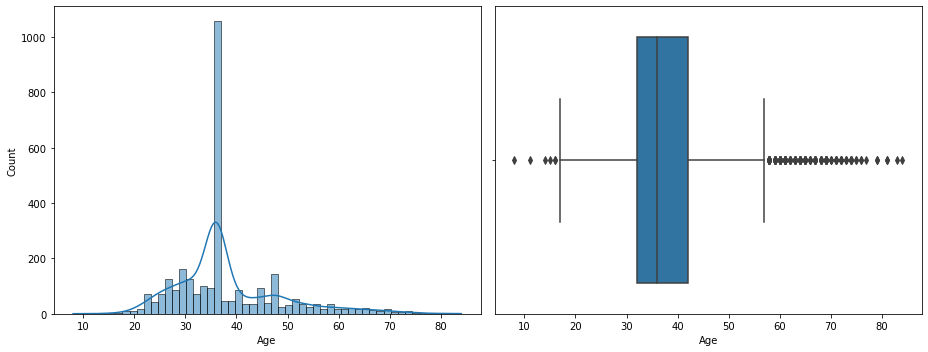

In [114]:
univaranalysis('Age')

In [115]:
outlier_info('Age')

Interquartile range (IQR) of Age :  10.0
Number of upper outliers in Age :  198
Number of lower outliers in Age :  6
% of upper outlier in Age :  94.29 %
% of lower outlier in Age :  2.86 %


In [116]:
print('Range of values: ', insurance_df['Age'].max()-insurance_df['Age'].min())

Range of values:  76


# Commision

Description of Commision
----------------------------------------------------------------------------
null value  0
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64     



C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


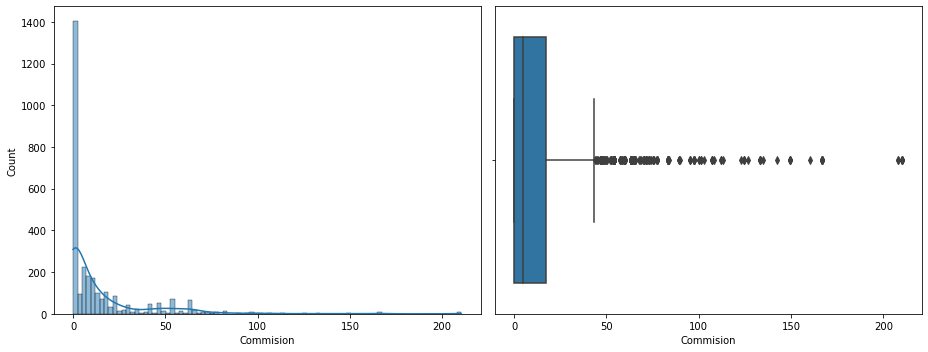

In [117]:
univaranalysis('Commision')

In [118]:
outlier_info('Commision')

Interquartile range (IQR) of Commision :  17.235
Number of upper outliers in Commision :  362
Number of lower outliers in Commision :  0
% of upper outlier in Commision :  172.38 %
% of lower outlier in Commision :  0.0 %


In [119]:
print('Range of values: ', insurance_df['Commision'].max()-insurance_df['Commision'].min())

Range of values:  210.21


# Duration

Description of Duration
----------------------------------------------------------------------------
null value  0
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64     



C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


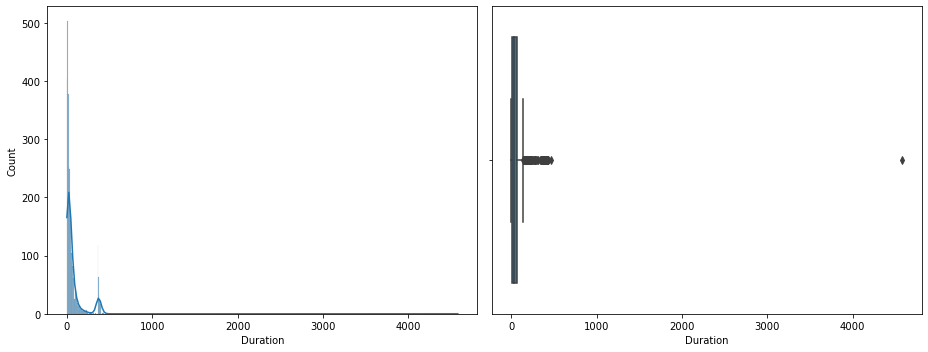

In [120]:
univaranalysis('Duration')

In [121]:
outlier_info('Duration')

Interquartile range (IQR) of Duration :  52.0
Number of upper outliers in Duration :  382
Number of lower outliers in Duration :  0
% of upper outlier in Duration :  181.9 %
% of lower outlier in Duration :  0.0 %


In [122]:
print('Range of values: ', insurance_df['Duration'].max()-insurance_df['Duration'].min())

Range of values:  4581


# Sales

Description of Sales
----------------------------------------------------------------------------
null value  0
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64     



C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


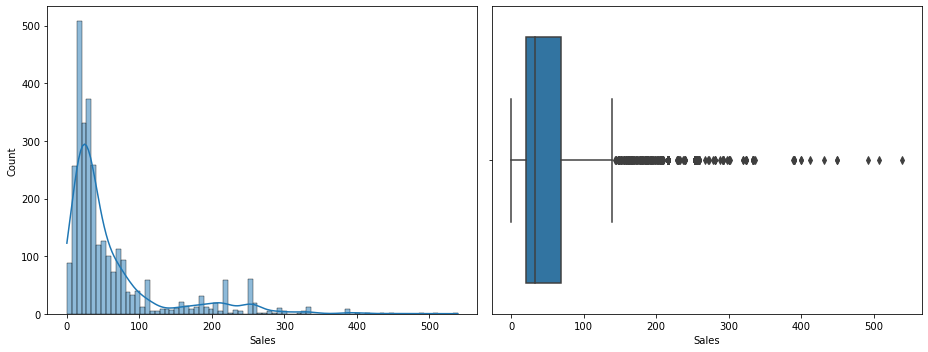

In [123]:
univaranalysis('Sales')

In [124]:
outlier_info('Sales')

Interquartile range (IQR) of Sales :  49.0
Number of upper outliers in Sales :  353
Number of lower outliers in Sales :  0
% of upper outlier in Sales :  168.1 %
% of lower outlier in Sales :  0.0 %


In [125]:
print('Range of values: ', insurance_df['Sales'].max()-insurance_df['Sales'].min())

Range of values:  539.0


# Categorical variables

# Claimed

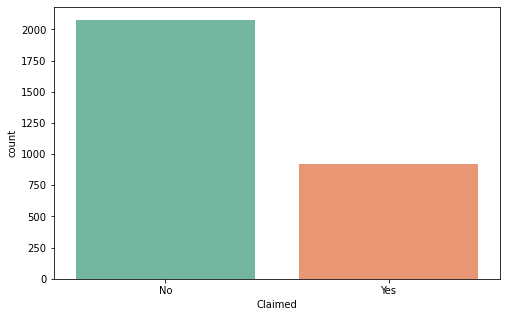

In [126]:
plt.figure(figsize=(8,5))
sns.countplot(data = insurance_df, x = 'Claimed', palette='Set2');

# Agency_Code

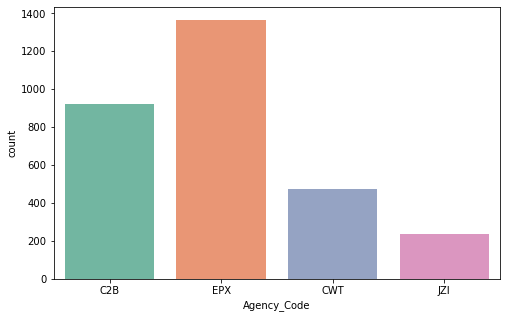

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(data = insurance_df, x = 'Agency_Code', palette='Set2');

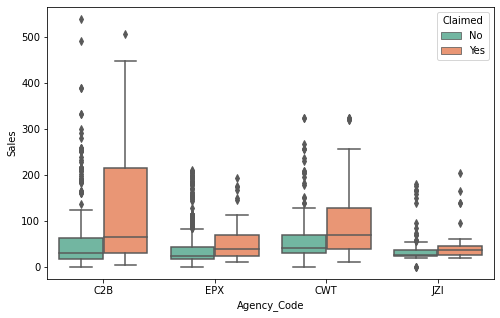

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(data = insurance_df, x='Agency_Code',y='Sales', hue='Claimed', palette='Set2');

# Type

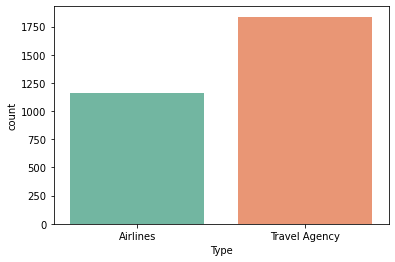

In [129]:
sns.countplot(data = insurance_df, x = 'Type', palette='Set2');

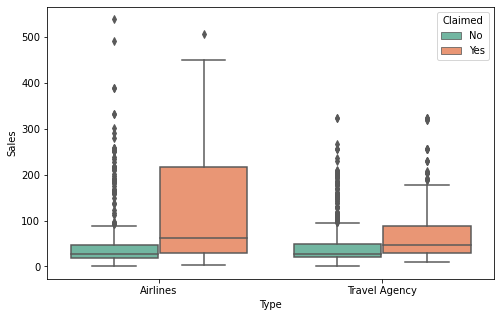

In [130]:
plt.figure(figsize=(8,5))
sns.boxplot(data = insurance_df, x='Type',y='Sales', hue='Claimed', palette='Set2');

# Channel

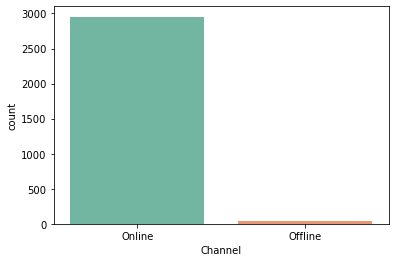

In [131]:
sns.countplot(data = insurance_df, x = 'Channel', palette='Set2');

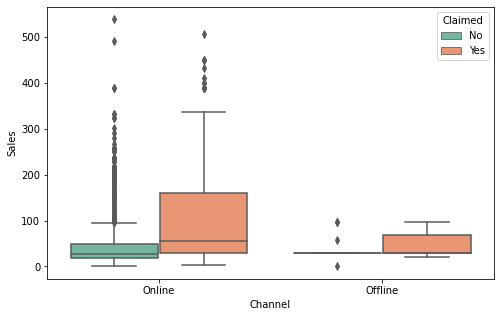

In [132]:
plt.figure(figsize=(8,5))
sns.boxplot(data = insurance_df, x='Channel',y='Sales', hue='Claimed', palette='Set2');

# Product_Name

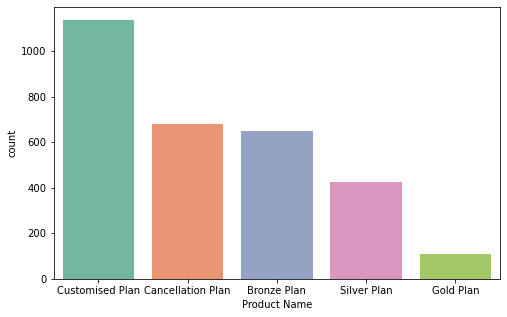

In [133]:
plt.figure(figsize=(8,5))
sns.countplot(data = insurance_df, x = 'Product Name', palette='Set2');

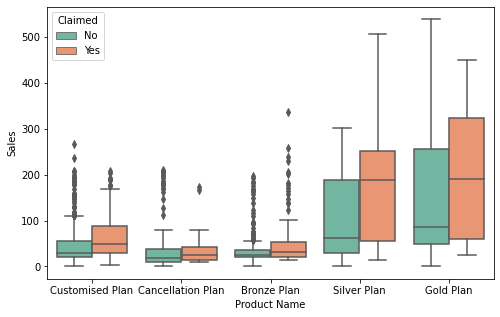

In [134]:
plt.figure(figsize=(8,5))
sns.boxplot(data = insurance_df, x='Product Name',y='Sales', hue='Claimed', palette='Set2');

# Destination

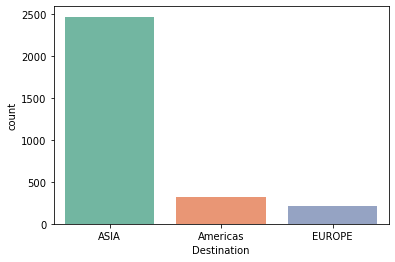

In [135]:
sns.countplot(data = insurance_df, x = 'Destination', palette='Set2');

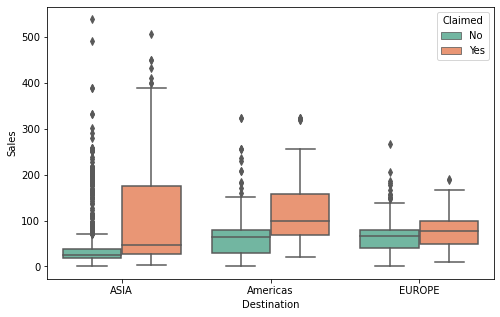

In [136]:
plt.figure(figsize=(8,5))
sns.boxplot(data = insurance_df, x='Destination',y='Sales', hue='Claimed', palette='Set2');

# Checking pairwise distribution of the continuous variables

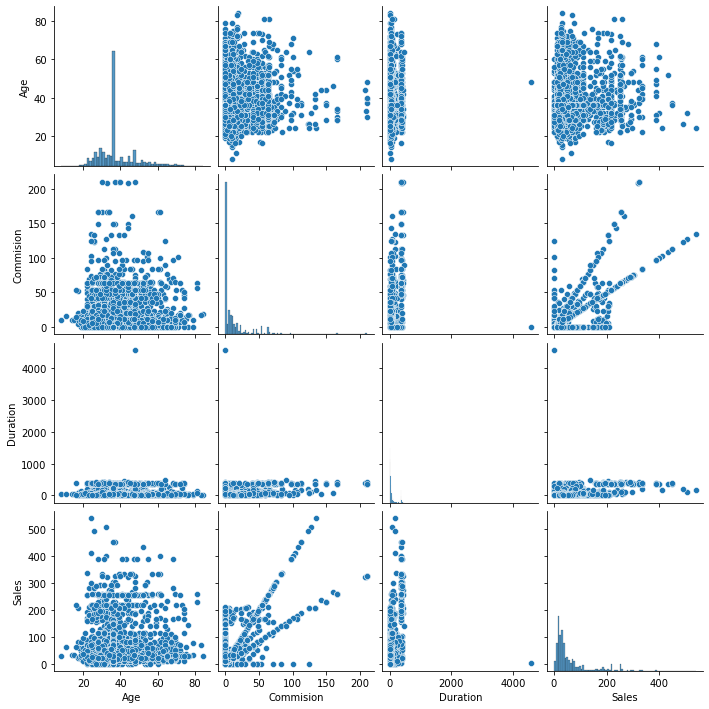

In [137]:
sns.pairplot(insurance_df[['Age', 'Commision', 'Duration', 'Sales']]);

# Checking for Correlations

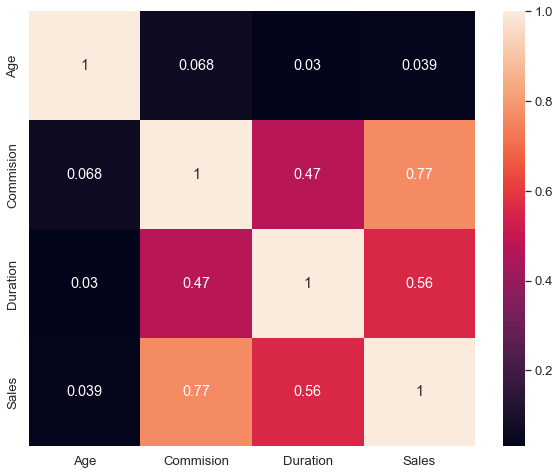

In [138]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(insurance_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True);

# Converting all objects to categorical codes

In [139]:
#Label Encoding
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance_df[feature].unique()))
        print(pd.Categorical(insurance_df[feature].unique()).codes)
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes
        



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [140]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


# Proportion of 1s and 0s

In [141]:
insurance_df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Extracting the target column into separate vectors for training set and test set

In [142]:
X = insurance_df.drop("Claimed", axis=1)
y = insurance_df.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


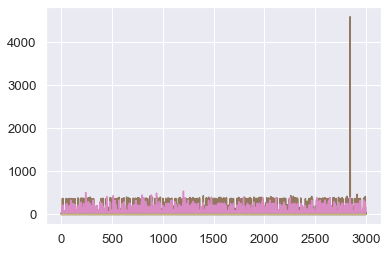

In [143]:
# prior to scaling 
plt.plot(X)
plt.show()

In [144]:
# Scaling the attributes.
from scipy.stats import zscore
scaled_df=X.apply(zscore)
scaled_df.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


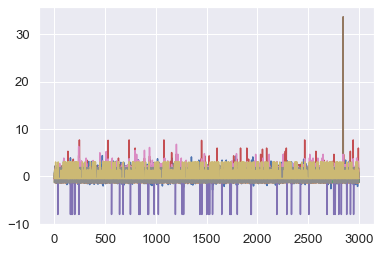

In [145]:
# prior to scaling 
plt.plot(scaled_df)
plt.show()

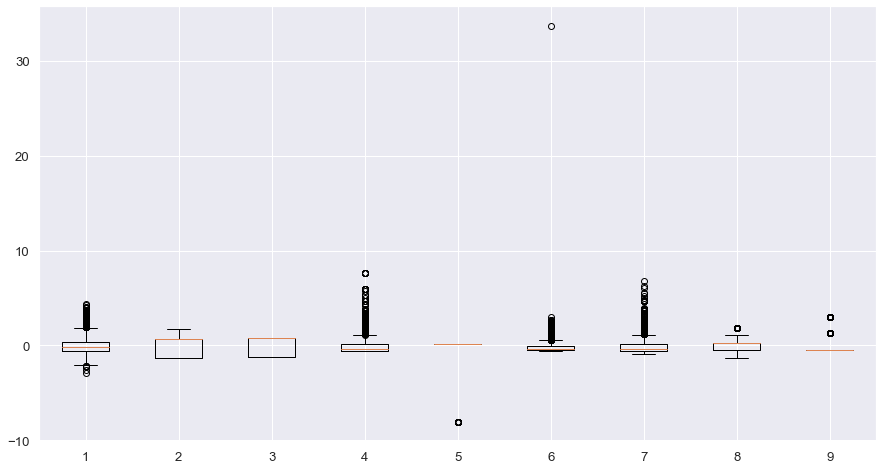

In [146]:
plt.figure(figsize=(15,8))
plt.boxplot(scaled_df);

# Splitting data into training and test set

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(scaled_df, y, test_size=.30, random_state=5)

# Splitting data into training and test set

In [148]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


# Building a Decision Tree Classifier

In [149]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [150]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=250, random_state=1)

In [151]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5, 4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [152]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 3.5, 'min_samples_leaf': 44, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=3.5, min_samples_leaf=44,
                       min_samples_split=150, random_state=1)

# Generating Tree

In [153]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))
tree_regularized.close()
dot_data

http://webgraphviz.com/

# Variable Importance - DTCL

In [154]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.676527
Sales         0.223015
Product Name  0.092427
Commision     0.008032
Age           0.000000
Type          0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


# Predicting on Training and Test dataset

In [155]:
ytrain_predict_dtcl= best_grid_dtcl.predict(X_train)
ytest_predict_dtcl= best_grid_dtcl.predict(X_test)

# Getting the Predicted Classes and Probs

In [156]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.935593,0.064407
2,0.935593,0.064407
3,0.656751,0.343249
4,0.935593,0.064407


# Building a Random Forest Classifier

In [157]:
param_grid_rfcl= {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,10,11,15],
    'min_samples_split': [46,50,55], 
    'n_estimators': [250,290,350,400] 
}

rfcl= RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator= rfcl, param_grid= param_grid_rfcl, cv= 5)

In [158]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl= grid_search_rfcl.best_estimator_
best_grid_rfcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 9, 'min_samples_split': 46, 'n_estimators': 250}


RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=9,
                       min_samples_split=46, n_estimators=250, random_state=1)

# Predicting the Training and Testing data

In [159]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

# Getting the Predicted Classes and Probs

In [160]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.768162,0.231838
1,0.977913,0.022087
2,0.897562,0.102438
3,0.638420,0.361580
4,0.876840,0.123160


# Variable Importance via RF

In [161]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.320157
Product Name  0.223471
Sales         0.170248
Commision     0.113453
Duration      0.071768
Type          0.049707
Age           0.041356
Destination   0.008308
Channel       0.001533


# Building a Neural Network Classifier

In [162]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [163]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

# Predicting the Training and Testing data

In [164]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

# Getting the Predicted Classes and Probs

In [165]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

# CART - AUC and ROC for the training data

AUC: 0.810


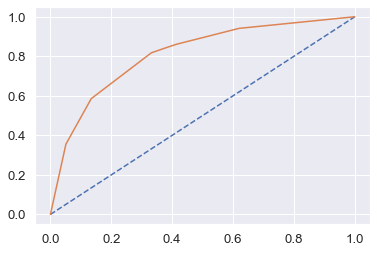

In [166]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

# CART -AUC and ROC for the test data

AUC: 0.799


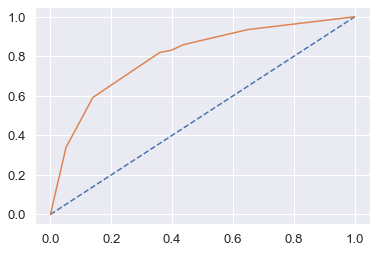

In [167]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

# CART Confusion Matrix and Classification Report for the training data

In [168]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [169]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7795238095238095

In [170]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [171]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
insurance_df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(insurance_df.loc["1"][2],2)
cart_train_recall=round(insurance_df.loc["1"][1],2)
cart_train_precision=round(insurance_df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.59
cart_train_f1  0.62


# CART Confusion Matrix and Classification Report for the testing data

In [172]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]], dtype=int64)

In [173]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7777777777777778

In [174]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [175]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
insurance_df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(insurance_df.loc["1"][0],2)
cart_test_recall=round(insurance_df.loc["1"][1],2)
cart_test_f1=round(insurance_df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.59
cart_test_f1  0.62


# CART Conclusion

### Train Data:
- AUC: 82%
- Accuracy: 79%
- Precision: 70%
- f1-Score: 60%

### Test Data:
  - AUC: 80%
   - Accuracy: 77%
   - Precision: 80%
   - f1-Score: 84%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.


# RF Model Performance Evaluation on Training data

In [176]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1295,  158],
       [ 245,  402]], dtype=int64)

In [177]:
rf_train_acc= best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8080952380952381

In [178]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1453
           1       0.72      0.62      0.67       647

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.80      0.81      0.80      2100



In [179]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
insurance_df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(insurance_df.loc["1"][0],2)
rf_train_recall=round(insurance_df.loc["1"][1],2)
rf_train_f1=round(insurance_df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.62
rf_train_f1  0.67


Area under Curve is 0.8590099256348588


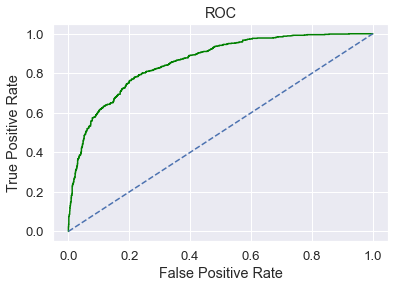

In [180]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# RF Model Performance Evaluation on Test data

In [181]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[543,  80],
       [119, 158]], dtype=int64)

In [182]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7788888888888889

In [183]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       623
           1       0.66      0.57      0.61       277

    accuracy                           0.78       900
   macro avg       0.74      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [184]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
insurance_df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(insurance_df.loc["1"][0],2)
rf_test_recall=round(insurance_df.loc["1"][1],2)
rf_test_f1=round(insurance_df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.57
rf_test_f1  0.61


Area under Curve is 0.8196713236870621


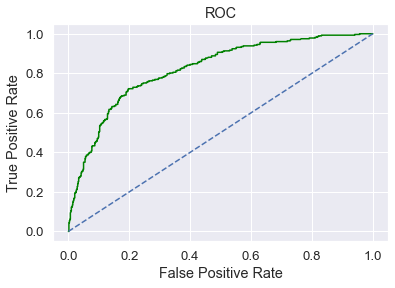

In [185]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

# Random Forest Conclusion


### Train Data:
   - AUC: 86%
   - Accuracy: 80%
   - Precision: 72%
   - f1-Score: 66%

### Test Data:
   - AUC: 82%
   - Accuracy: 78%
   - Precision: 68%
   - f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# NN Model Performance Evaluation on Training data

In [186]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [187]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [188]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [189]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
insurance_df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(insurance_df.loc["1"][0],2)
nn_train_recall=round(insurance_df.loc["1"][1],2)
nn_train_f1=round(insurance_df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


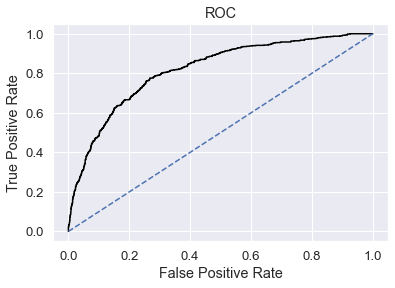

In [190]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# NN Model Performance Evaluation on Test data

In [191]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]], dtype=int64)

In [192]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [193]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [194]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
insurance_df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(insurance_df.loc["1"][0],2)
nn_test_recall=round(insurance_df.loc["1"][1],2)
nn_test_f1=round(insurance_df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


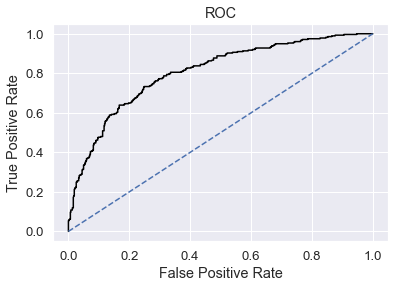

In [195]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

# Neural Network Conclusion


### Train Data:
   - AUC: 82%
   - Accuracy: 78%
   - Precision: 68%
   - f1-Score: 59

### Test Data:
   - AUC: 80%
   - Accuracy: 77%
   - Precision: 67%
   - f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

# Comparison of the performance metrics from the 3 models

In [196]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.81,0.78,0.78,0.77
AUC,0.81,0.80,0.86,0.82,0.82,0.80
Recall,0.59,0.59,0.62,0.57,0.51,0.50
Precision,0.66,0.65,0.72,0.66,0.68,0.67
F1 Score,0.62,0.62,0.67,0.61,0.59,0.57


# ROC Curve for the 3 models on the Training data

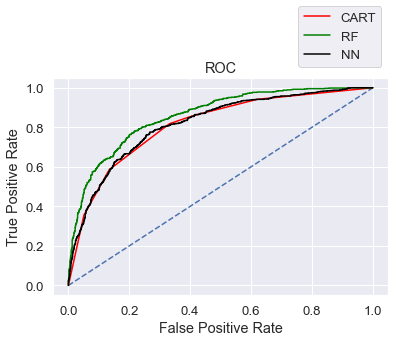

In [197]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

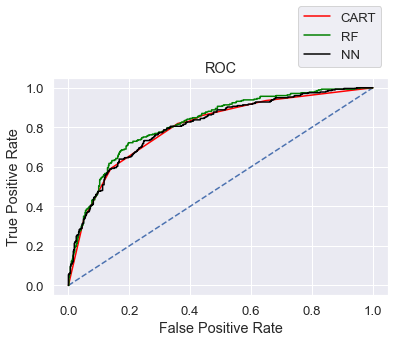

In [198]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# CONCLUSION :
    
   # I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.

# 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

### Recommendations

It is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

 -	Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.
 -	As per the data 90% of insurance is done by online channel.
 -	Other interesting fact, is almost all the offline business has a  claimed associated, need to find why?
 -	Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency
 -	Also based on the model we are getting 80%accuracy, so we need customer books airline   tickets or plans, cross sell  the insurance based on the claim data pattern.
 -	Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?
